<a href="https://colab.research.google.com/github/KjelleJ/enkla-ai-experiment/blob/main/AIX_4_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# REGRESSION: En regressionsmodell förutsäger ett kontinuerligt numeriskt värde.
---
## Ett enkelt exempel: Genomsnittslängden av svenska rekryter 1845-1967
https://gupea.ub.gu.se/bitstream/2077/854/1/Historisk%20statistik%20Del%201.pdf Tabell 56

In [ ]:
#import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Våra datapunkter - från SCB

In [ ]:
rekryter = np.array([[1845,167.4],[1850,167.4],[1855,167.8],[1860,168.1],[1865,168.5],[1870,169.6],
                    [1890,169.2],[1895,169.6],[1900,170.1],
                    [1905,170.8],[1910,171.6],[1915,172.0],[1920,171.7],[1925,172.1],[1930,172.7],
                    [1935,173.2],[1940,174.2],[1945,174.5],[1950,175.0],[1955,175.7],[1960,176.1],
                    [1965,177.4],[1966,177.7],[1967,177.7]])

In [ ]:
rekryter

array([[1845. ,  167.4],
       [1850. ,  167.4],
       [1855. ,  167.8],
       [1860. ,  168.1],
       [1865. ,  168.5],
       [1870. ,  169.6],
       [1890. ,  169.2],
       [1895. ,  169.6],
       [1900. ,  170.1],
       [1905. ,  170.8],
       [1910. ,  171.6],
       [1915. ,  172. ],
       [1920. ,  171.7],
       [1925. ,  172.1],
       [1930. ,  172.7],
       [1935. ,  173.2],
       [1940. ,  174.2],
       [1945. ,  174.5],
       [1950. ,  175. ],
       [1955. ,  175.7],
       [1960. ,  176.1],
       [1965. ,  177.4],
       [1966. ,  177.7],
       [1967. ,  177.7]])

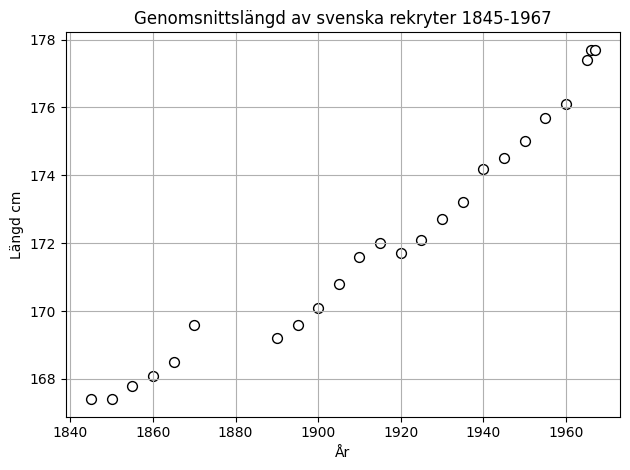

In [ ]:
# plotta datapunkterna
plt.scatter(rekryter[:,[0]], rekryter[:,[1]], c='white', marker='o', edgecolor='black', s=50)
plt.title("Genomsnittslängd av svenska rekryter 1845-1967")
plt.grid()
plt.xlabel('År')
plt.ylabel('Längd cm')
plt.tight_layout()
tionerplt.show()

---
#LINJÄR REGRESSION
---
En rät linje anpassas på bästa sätt till våra datapunkter. Alla förutsägelser/prediktioner finns på den röda linjen

In [ ]:
# Skapa, träna och utvärdera regressionsmodellen
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score

reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=300, tol=1e-3))
reg.fit(rekryter[:,[0]], np.ravel(rekryter[:,[1]],order="c"))
y_pred = reg.predict(rekryter[:,[0]])
# R^2: 1 är perfekt, 0.5 mera gissning
print('R^2: %.2f' % r2_score(rekryter[:,[1]], y_pred))
l1942 = reg.predict(np.array([1942.]).reshape(-1, 1))
l1880 = reg.predict(np.array([1880.]).reshape(-1, 1))
print('Uppskattad längd 1942: %.2f'% l1942[0])
print('Uppskattad längd 1880: %.2f'% l1880[0])

R^2: 0.95
Uppskattad längd 1942: 174.29
Uppskattad längd 1880: 169.21


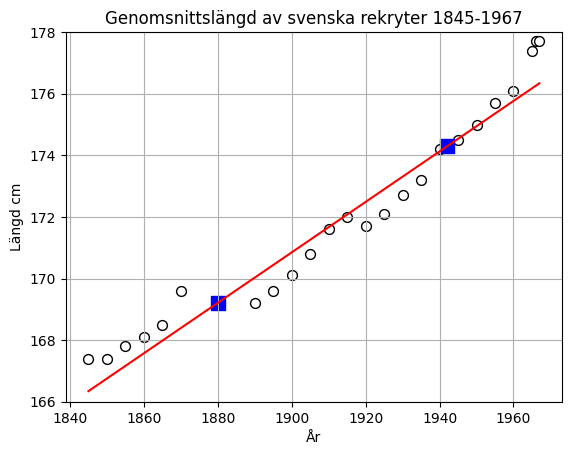

In [ ]:
# Plotta regressionslinjen och datapunkterna
plt.scatter(rekryter[:,[0]], rekryter[:,[1]], c='white', marker='o', edgecolor='black', s=50)
plt.title("Genomsnittslängd av svenska rekryter 1845-1967")
plt.grid()
plt.ylim([166, 178])
plt.xlabel('År')
plt.ylabel('Längd cm')
plt.plot(rekryter[:,[0]], y_pred, color='red')
plt.scatter([1880., 1942.], [l1880, l1942] , c='blue', marker='s', edgecolor='blue', s=100)
plt.draw()

---
#BESLUTSTRÄD
---
Belutsträd kan användas för regression. Här ett enkelt beslutsträd med max_depth=3. Anpassningen blir en trappa där varje trappsteg motsvarar ett löv i trädet.
Trädet kan inte extrapolera. Rekryterna blir t.ex. aldrig längre än 177.5 cm!

In [ ]:
# Skapa, träna och utvärdera beslutsträdet
from sklearn import tree
from sklearn.metrics import r2_score

regtree = tree.DecisionTreeRegressor(max_depth=3)
regtree.fit(rekryter[:,[0]], np.ravel(rekryter[:,[1]],order="c"))
y_pred = regtree.predict(rekryter[:,[0]])
# R^2: 1 är perfekt, 0.5 mera gissning
print('R^2: %.2f' % r2_score(rekryter[:,[1]], y_pred))
l1942 = regtree.predict(np.array([1942.]).reshape(-1, 1))
l1880 = regtree.predict(np.array([1880.]).reshape(-1, 1))
print('Uppskattad längd 1942: %.2f'% l1942[0])
print('Uppskattad längd 1880: %.2f'% l1880[0])

R^2: 0.99
Uppskattad längd 1942: 174.57
Uppskattad längd 1880: 169.47


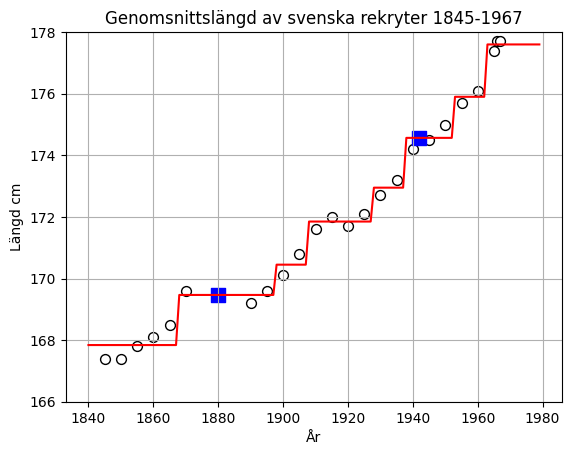

In [ ]:
# Plotta "regressionslinjen" och datapunkterna
plt.scatter(rekryter[:,[0]], rekryter[:,[1]], c='white', marker='o', edgecolor='black', s=50)
plt.title("Genomsnittslängd av svenska rekryter 1845-1967")
plt.grid()
plt.ylim([166, 178])
plt.xlabel('År')
plt.ylabel('Längd cm')
x_plot = np.array(range(1840, 1980))
y_plot = regtree.predict(x_plot.reshape(-1, 1))
plt.plot(x_plot, y_plot, color='red')
plt.scatter([1880., 1942.], [l1880, l1942] , c='blue', marker='s', edgecolor='blue', s=100)
plt.draw()

### Plottning av beslutsträdet och hur trädet kan tolkas
Exempel: Hur långa var rekryterna år 1920? Börja överst i trädet (i roten). **1)**1920 är mindre än 1927.5 (true) => vänster. **2)** 1920 är större än 1897.5 (false) => höger. **3)** 1920 är större än 1907.5 (false) => höger. Värdet är 171.85. 4 "samples" i lövet. Stämmer med plottningen ovan.

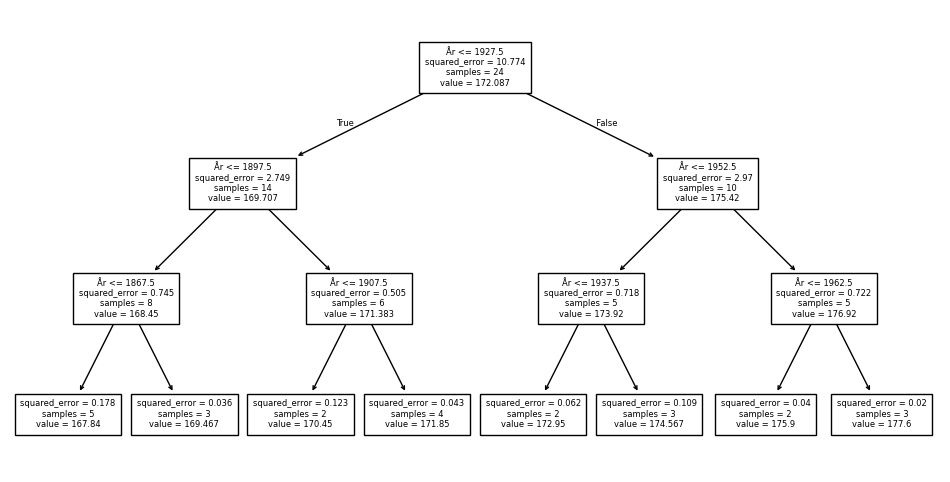

In [ ]:
plt.figure(figsize=(12, 6))
_ = tree.plot_tree(regtree, feature_names=["År"], filled=False, fontsize=6)